Extracted the key parts from https://github.com/JuliaMath/RandomMatrices.jl/blob/master/src/densities/TracyWidom.jl

In [34]:
using SpecialFunctions, FastGaussQuadrature, LinearAlgebra

In [35]:
airy_kernel(x, y) = x==y ? (airyaiprime(x))^2 - x * (airyai(x))^2 :
           (airyai(x) * airyaiprime(y) - airyai(y) * airyaiprime(x)) / (x - y)
ϕ(ξ, s) =  s + 10*tan(π*(ξ+1)/4) # Transformation from [-1,1] to (s,∞)
ϕ′(ξ) = (5π/2)*(sec(π*(ξ+1)/4))^2
K(ξ,η,s) = sqrt(ϕ′(ξ) * ϕ′(η)) * airy_kernel(ϕ(ξ,s), ϕ(η,s))

K (generic function with 1 method)

In [36]:
# Tracy widom at s = -2 using "det"
n = 100 
s = -2
nodes,weights = gausslegendre(n)
det(I - (K.(nodes',nodes,s)) .* (√).(weights) .* (√).(weights'))

0.41322414250512246

In [27]:
# Eigenvalues of airy Kernel at s = -2
λ = sort(eigvals(Symmetric(K.(nodes',nodes,s) .* (√).(weights) .* (√).(weights'))  ) , rev =true)
λ = λ[ λ .> 1e-15]

7-element Array{Float64,1}:
 0.5765544712213151    
 0.023947900315389396  
 0.00019436102447910228
 1.0231068630369925e-6 
 4.400191076272687e-9  
 1.669643670556442e-11 
 5.813520698657187e-14 

In [28]:
prod(1 .- λ)  # product of 1-eigs = det = tracy widom

0.4132241425051226

In [37]:
A = Symmetric(K.(nodes',nodes,s) .* (√).(weights) .* (√).(weights'))
det(I - A[1:35,1:35])

0.4132347796070696

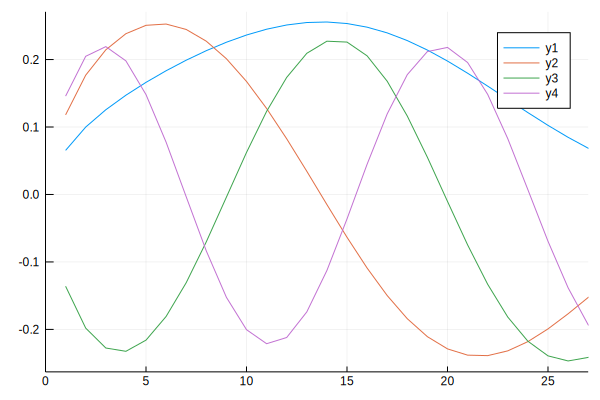

In [49]:
plot(-F[:,end])
plot!(-F[:,end-1])
plot!(-F[:,end-2],xlim=(0,27))
plot!(-F[:,end-3],xlim=(0,27))

In [84]:
nodes,weights = gausslegendre(7)

([-0.9491079123427585, -0.7415311855993945, -0.40584515137739713, 0.0, 0.40584515137739713, 0.7415311855993945, 0.9491079123427585], [0.12948496616886973, 0.2797053914892766, 0.3818300505051189, 0.4179591836734694, 0.3818300505051189, 0.2797053914892766, 0.12948496616886973])

In [105]:
n = 10
nodes,weights = gausslegendre(n)
hcat( [ weights ⋅ (x->x^k).(nodes) for k=0:2*n], [k%2==1 ? 0 : 2/(k+1) for k=0:2*n])

21×2 Array{Real,2}:
  2.0          2.0      
 -4.16334e-17  0        
  0.666667     0.666667 
 -1.38778e-17  0        
  0.4          0.4      
  0.0          0        
  0.285714     0.285714 
  1.38778e-17  0        
  0.222222     0.222222 
  0.0          0        
  0.181818     0.181818 
 -6.93889e-18  0        
  0.153846     0.153846 
  0.0          0        
  0.133333     0.133333 
  0.0          0        
  0.117647     0.117647 
  6.93889e-18  0        
  0.105263     0.105263 
  0.0          0        
  0.0952352    0.0952381

In [150]:
n = 10
d = [0.0 for m =(n):-1:1.0]
e = [1/√(4-1/m^2) for m=1:(n-1)]
eigvals(SymTridiagonal(d,e))

10-element Array{Float64,1}:
 -0.9739065285171714 
 -0.8650633666889843 
 -0.6794095682990245 
 -0.4333953941292471 
 -0.1488743389816315 
  0.14887433898163172
  0.43339539412924716
  0.6794095682990244 
  0.8650633666889842 
  0.9739065285171716 

In [89]:
2*eigvecs(SymTridiagonal(d,e))[1,:].^2

7-element Array{Float64,1}:
 0.12948496616886812
 0.2797053914892805 
 0.38183005050511776
 0.41795918367346957
 0.38183005050511837
 0.2797053914892761 
 0.12948496616886948

In [152]:
n= 1000
r = range(-1,stop=1,length=n)
V = r.^(0:n-1)'
Q, = qr(V)
T = Q'*diagm(r)*Q
T = SymTridiagonal(diag(T),abs.(diag(T,-1)))
round.(T.ev[1:10],digits=3)

10-element Array{Float64,1}:
 0.578
 0.517
 0.508
 0.504
 0.503
 0.502
 0.502
 0.501
 0.501
 0.501

In [153]:
e

9-element Array{Float64,1}:
 0.5773502691896258
 0.5163977794943222
 0.50709255283711  
 0.5039526306789696
 0.502518907629606 
 0.5017452060042544
 0.501280411827603 
 0.5009794328681196
 0.5007733956671915